In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
"""import pyarrow as pa
from pyarrow.parquet import ParquetFile"""
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Данные

https://www.kaggle.com/datasets/rikdifos/credit-card-approval-prediction/data

Feature name	Explanation	Remarks

`ID` -	Client number

`CODE_GENDER` -	Gender

`FLAG_OWN_CAR` -	Is there a car

`FLAG_OWN_REALTY` -	Is there a property

`CNT_CHILDREN` -	Number of children

`AMT_INCOME_TOTAL` -	Annual income

`NAME_INCOME_TYPE` -	Income category

`NAME_EDUCATION_TYPE` -	Education level

`NAME_FAMILY_STATUS` -	Marital status

`NAME_HOUSING_TYPE` -	Way of living

`DAYS_BIRTH	Birthday` -	Count backwards from current day (0), -1 means yesterday

`DAYS_EMPLOYED` -	Start date of employment	Count backwards from current day(0). If positive, it means the person currently unemployed.

`FLAG_MOBIL` -	Is there a mobile phone

`FLAG_WORK_PHONE` -	Is there a work phone

`FLAG_PHONE` -	Is there a phone

`FLAG_EMAIL` -	Is there an email

`OCCUPATION_TYPE` -	Occupation

`CNT_FAM_MEMBERS` -	Family size

_____

`ID` - 	Client number

`MONTHS_BALANCE` - 	Record month	(The month of the extracted data is the starting point, backwards, 0 is the current month, -1 is the previous month, and so on)

`STATUS` - 	Status	(0: 1-29 days past due 1: 30-59 days past due 2: 60-89 days overdue 3: 90-119 days overdue 4: 120-149 days overdue 5: Overdue or bad debts, write-offs for more than 150 days C: paid off that month X: No loan for the month)

__________________________________________________________________________

In [112]:
X = pd.read_csv('application_record.csv',index_col="ID")
y = pd.read_csv('credit_record.csv',index_col="ID")

df = pd.merge(X, y, on ='ID', how='inner').drop_duplicates().drop(['MONTHS_BALANCE', 'FLAG_MOBIL'], axis = 1).dropna()
df = df.loc[df['STATUS'] != 'X']
df['STATUS'] = df['STATUS'].replace({'0':1, '1':2, '2':3, '3':4, '4':5, '5':6, 'C':0})
df

C:\Users\polin\AppData\Local\Temp\ipykernel_14996\3240005633.py:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['STATUS'] = df['STATUS'].replace({'0':1, '1':2, '2':3, '3':4, '4':5, '5':6, 'C':0})


,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,STATUS
ID,,,,,,,,,,,,,,,,,
5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,0,0,0,Security staff,2.0,0
5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,0,0,0,Security staff,2.0,0
5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,0,0,0,Security staff,2.0,0
5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,0,0,0,Security staff,2.0,0
5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,0,0,0,Security staff,2.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5150337,M,N,Y,0,112500.0,Working,Secondary / secondary special,Single / not married,Rented apartment,-9188,-1193,0,0,0,Laborers,1.0,1
5150337,M,N,Y,0,112500.0,Working,Secondary / secondary special,Single / not married,Rented apartment,-9188,-1193,0,0,0,Laborers,1.0,3
5150337,M,N,Y,0,112500.0,Working,Secondary / secondary special,Single / not married,Rented apartment,-9188,-1193,0,0,0,Laborers,1.0,2


In [113]:
df.describe().T.round(2)

,count,mean,std,min,25%,50%,75%,max
CNT_CHILDREN,255601.0,0.50,0.79,0.0,0.0,0.0,1.0,19.0
AMT_INCOME_TOTAL,255601.0,193606.63,104038.91,27000.0,135000.0,180000.0,225000.0,1575000.0
DAYS_BIRTH,255601.0,-15004.12,3451.53,-24611.0,-17615.0,-14806.0,-12183.0,-7705.0
DAYS_EMPLOYED,255601.0,-2709.31,2400.13,-15713.0,-3611.0,-2053.0,-1002.0,-17.0
FLAG_WORK_PHONE,255601.0,0.27,0.45,0.0,0.0,0.0,1.0,1.0
FLAG_PHONE,255601.0,0.29,0.46,0.0,0.0,0.0,1.0,1.0
FLAG_EMAIL,255601.0,0.10,0.30,0.0,0.0,0.0,0.0,1.0
CNT_FAM_MEMBERS,255601.0,2.29,0.94,1.0,2.0,2.0,3.0,20.0
STATUS,255601.0,0.58,0.66,0.0,0.0,1.0,1.0,6.0


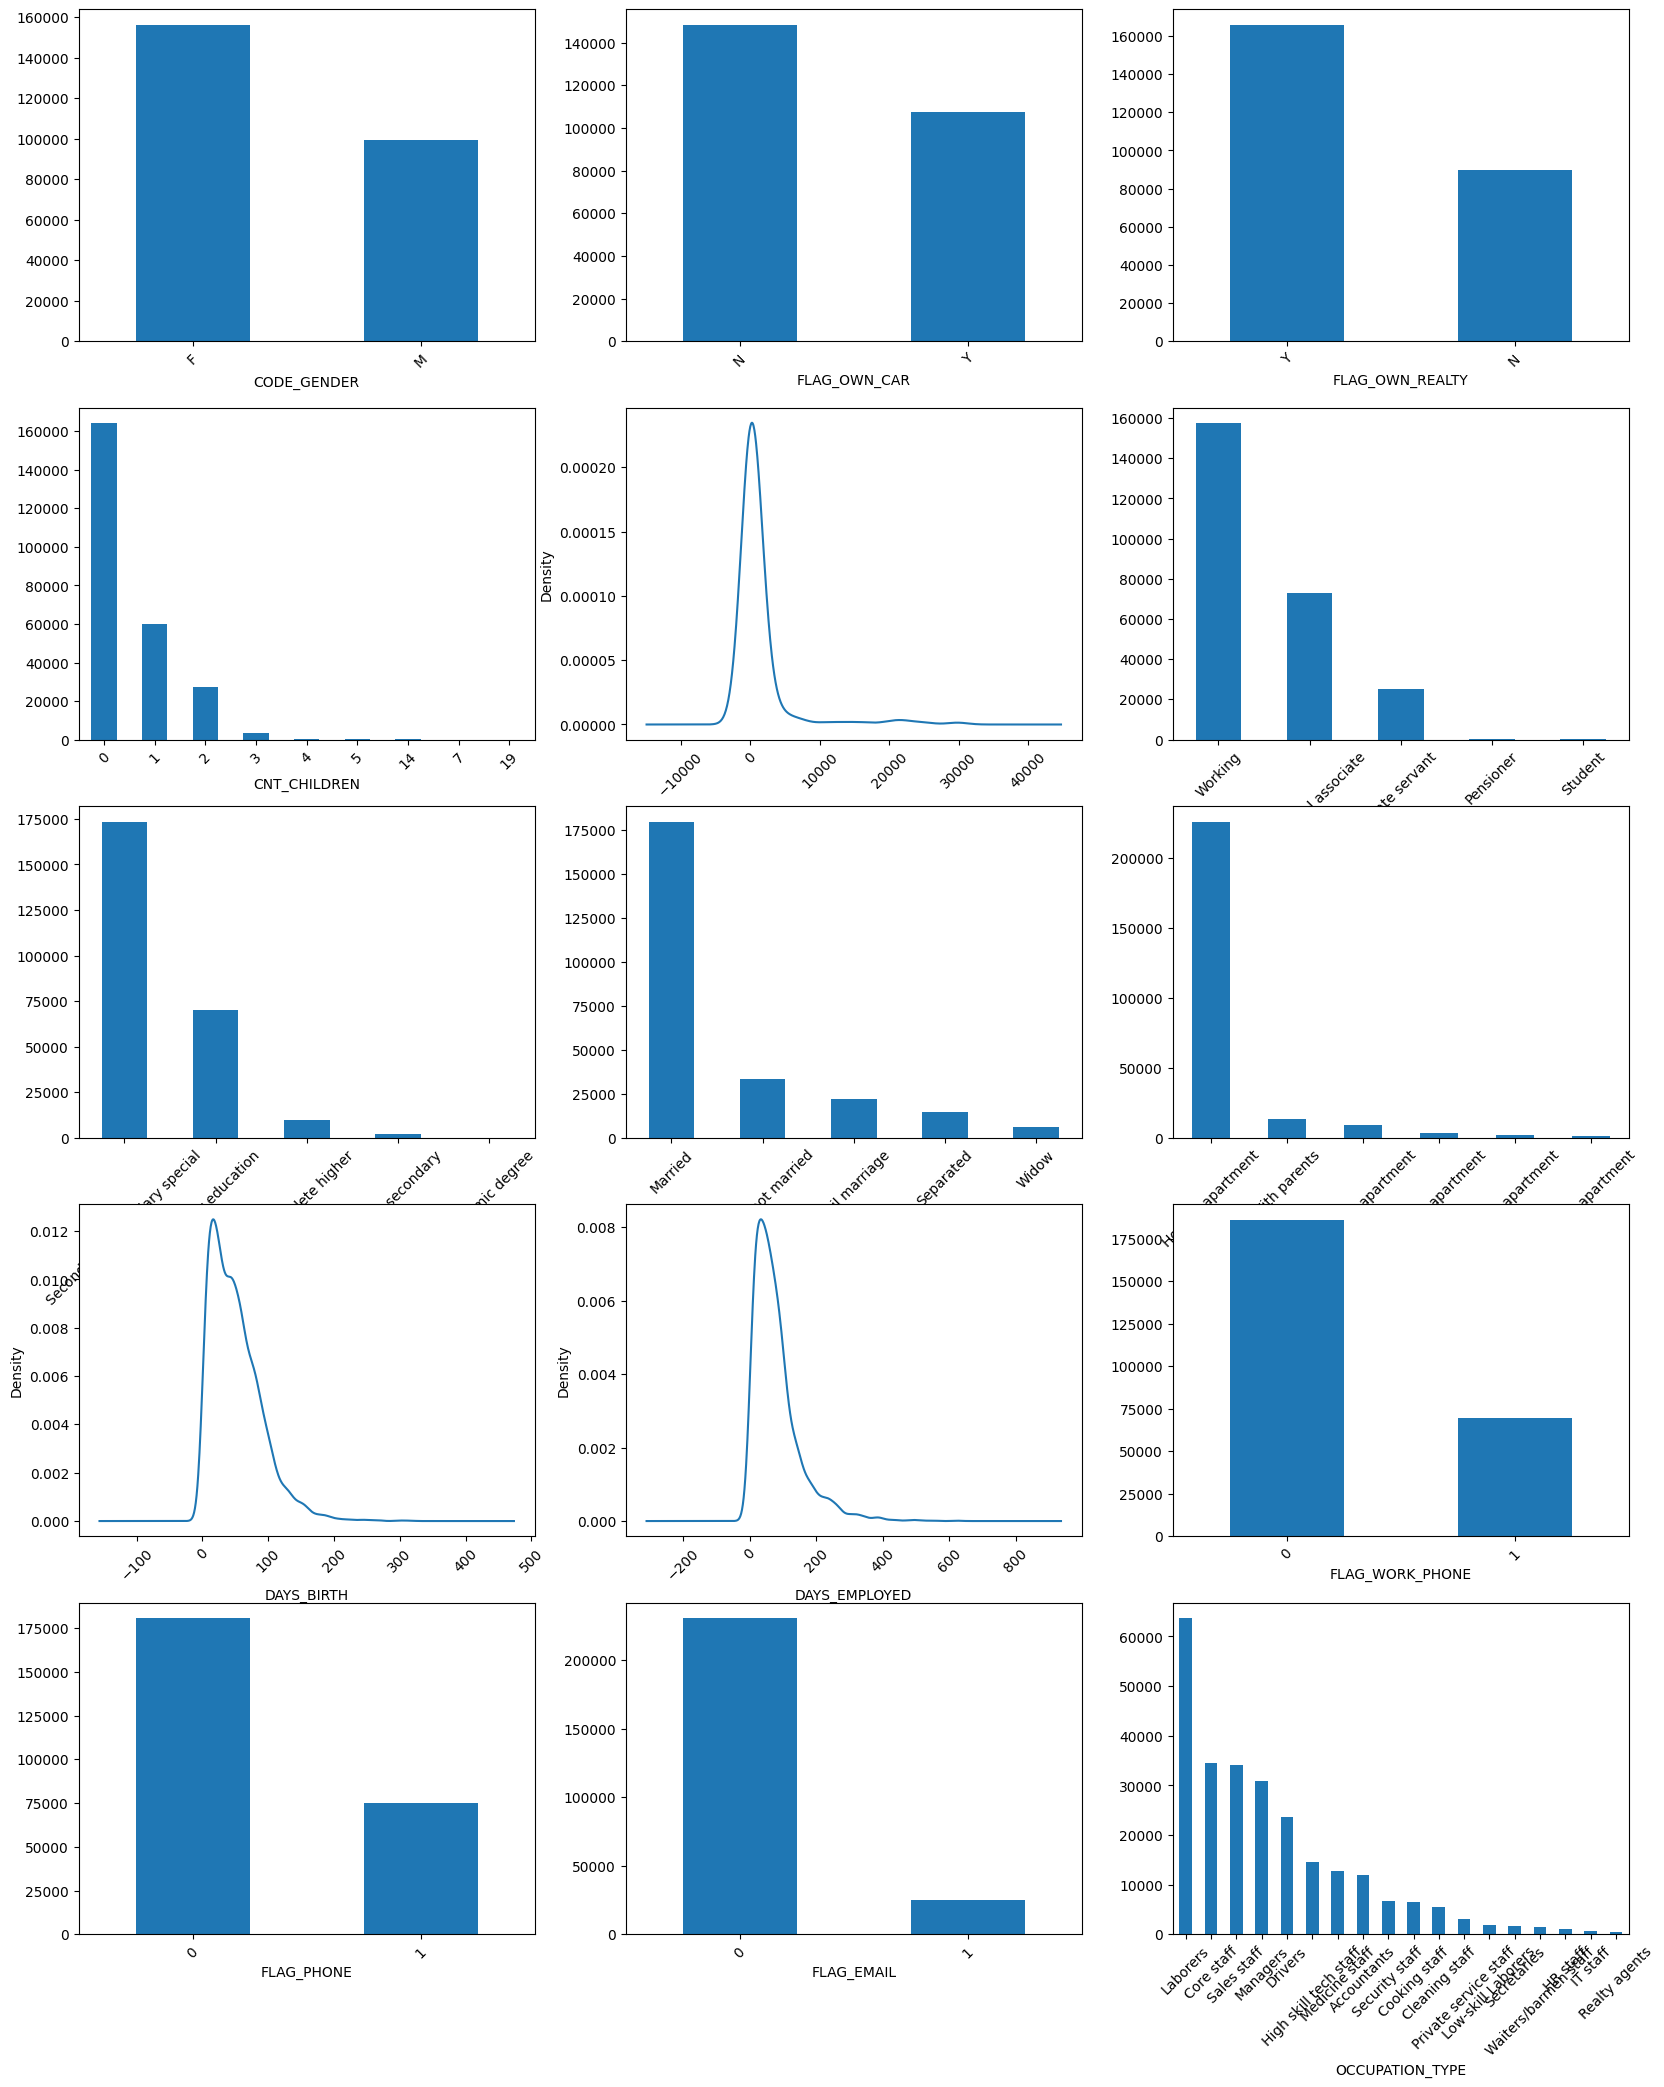

In [114]:
fig, axs = plt.subplots(5, 3, figsize=(20, 25))

plt.subplot(531)
df['CODE_GENDER'].value_counts(dropna=False).plot(kind='bar')
plt.xlabel('CODE_GENDER')
plt.xticks(rotation=45)

plt.subplot(532)
df['FLAG_OWN_CAR'].value_counts(dropna=False).plot(kind='bar')
plt.xlabel('FLAG_OWN_CAR')
plt.xticks(rotation=45)

plt.subplot(533)
df['FLAG_OWN_REALTY'].value_counts(dropna=False).plot(kind='bar')
plt.xlabel('FLAG_OWN_REALTY')
plt.xticks(rotation=45)

plt.subplot(534)
df['CNT_CHILDREN'].astype(int).value_counts(dropna=False, sort=True).plot(kind='bar')
plt.xlabel('CNT_CHILDREN')
plt.xticks(rotation=45)

plt.subplot(535)
df['AMT_INCOME_TOTAL'].value_counts(dropna=False, sort=False).plot(kind='density')
plt.xlabel('AMT_INCOME_TOTAL')
plt.xticks(rotation=45)

plt.subplot(536)
df['NAME_INCOME_TYPE'].value_counts(dropna=False).plot(kind='bar')
plt.xlabel('NAME_INCOME_TYPE')
plt.xticks(rotation=45)

plt.subplot(537)
df['NAME_EDUCATION_TYPE'].value_counts(dropna=False).plot(kind='bar')
plt.xlabel('NAME_EDUCATION_TYPE')
plt.xticks(rotation=45)

plt.subplot(538)
df['NAME_FAMILY_STATUS'].value_counts(dropna=False).plot(kind='bar')
plt.xlabel('NAME_FAMILY_STATUS')
plt.xticks(rotation=45)

plt.subplot(539)
df['NAME_HOUSING_TYPE'].value_counts(dropna=False).plot(kind='bar')
plt.xlabel('NAME_HOUSING_TYPE')
plt.xticks(rotation=45)

plt.subplot(5,3,10)
df['DAYS_BIRTH'].value_counts(dropna=False, sort=False).plot(kind='density')
plt.xlabel('DAYS_BIRTH')
plt.xticks(rotation=45)

plt.subplot(5,3,11)
df['DAYS_EMPLOYED'].value_counts(dropna=False, sort=False).plot(kind='density')
plt.xlabel('DAYS_EMPLOYED')
plt.xticks(rotation=45)

plt.subplot(5,3,12)
df['FLAG_WORK_PHONE'].value_counts(dropna=False).plot(kind='bar')
plt.xlabel('FLAG_WORK_PHONE')
plt.xticks(rotation=45)

plt.subplot(5,3,13)
df['FLAG_PHONE'].value_counts(dropna=False).plot(kind='bar')
plt.xlabel('FLAG_PHONE')
plt.xticks(rotation=45)

plt.subplot(5,3,14)
df['FLAG_EMAIL'].value_counts(dropna=False).plot(kind='bar')
plt.xlabel('FLAG_EMAIL')
plt.xticks(rotation=45)

plt.subplot(5,3,15)
df['OCCUPATION_TYPE'].value_counts(dropna=False).plot(kind='bar')
plt.xlabel('OCCUPATION_TYPE')
plt.xticks(rotation=45)

plt.show();

<Axes: >

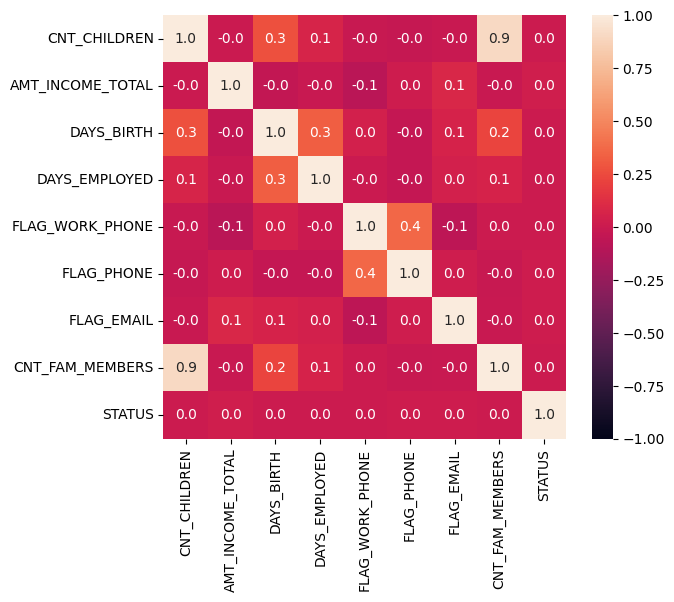

In [115]:
plt.figure(figsize=(6.5, 5.5))
sns.heatmap(df.corr(numeric_only=True), annot=True, fmt='.1f', vmin=-1)

In [116]:
df = pd.get_dummies(data = df,
                    columns = ['CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE'],
                    drop_first = True)
df = df.astype(int)
df = df.groupby(['ID']).mean()
df

,CNT_CHILDREN,AMT_INCOME_TOTAL,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,STATUS,CODE_GENDER_M,...,OCCUPATION_TYPE_Laborers,OCCUPATION_TYPE_Low-skill Laborers,OCCUPATION_TYPE_Managers,OCCUPATION_TYPE_Medicine staff,OCCUPATION_TYPE_Private service staff,OCCUPATION_TYPE_Realty agents,OCCUPATION_TYPE_Sales staff,OCCUPATION_TYPE_Secretaries,OCCUPATION_TYPE_Security staff,OCCUPATION_TYPE_Waiters/barmen staff
ID,,,,,,,,,,,,,,,,,,,,,
5008806,0.0,112500.0,-21474.0,-1134.0,0.0,0.0,0.0,2.0,0.500000,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
5008808,0.0,270000.0,-19110.0,-3051.0,0.0,1.0,1.0,1.0,1.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
5008810,0.0,270000.0,-19110.0,-3051.0,0.0,1.0,1.0,1.0,0.285714,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
5008811,0.0,270000.0,-19110.0,-3051.0,0.0,1.0,1.0,1.0,0.333333,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
5008815,0.0,270000.0,-16872.0,-769.0,1.0,1.0,1.0,2.0,1.000000,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5150480,1.0,157500.0,-10808.0,-1739.0,0.0,0.0,0.0,3.0,0.230769,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5150482,1.0,157500.0,-10808.0,-1739.0,0.0,0.0,0.0,3.0,0.666667,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5150484,1.0,157500.0,-10808.0,-1739.0,0.0,0.0,0.0,3.0,0.923077,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# 1. Исследование структуры данных
(используем методику из лабораторная работы 4 (п.1-п.5, используем либо кластерный анализ, либо факторный анализ)

In [117]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from scipy.cluster import hierarchy

In [118]:
features = df

In [119]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df.T)

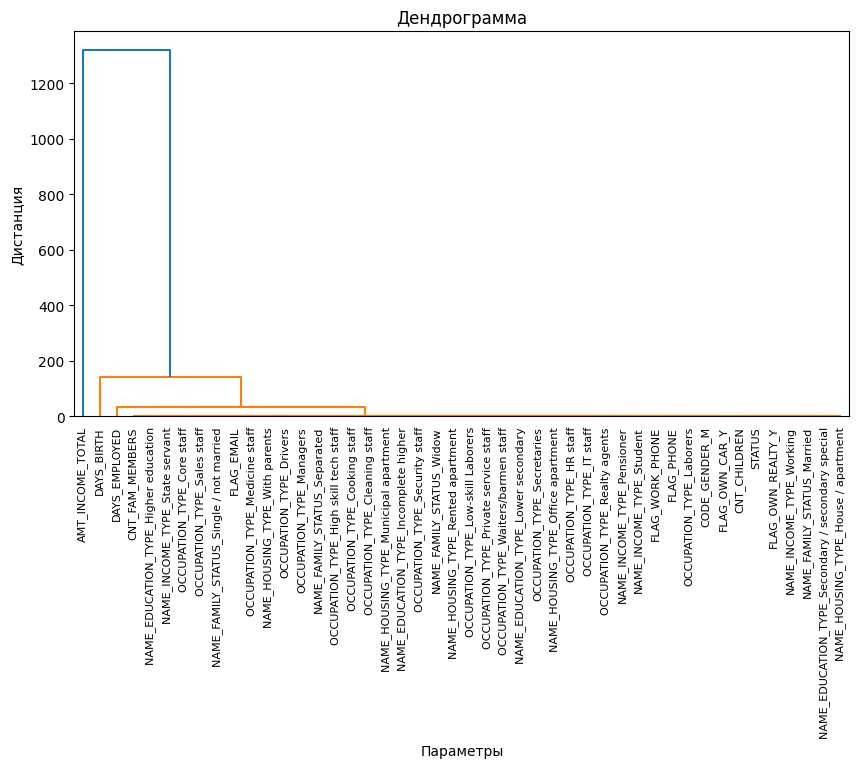

In [120]:
plt.figure(figsize=(10, 5))
dend = hierarchy.dendrogram(hierarchy.linkage(scaled_features, method='ward'),
                            labels=features.columns,
                            leaf_rotation=90)
plt.title('Дендрограмма')
plt.xlabel('Параметры')
plt.ylabel('Дистанция')
plt.show()

In [123]:
features = df.drop(columns=['AMT_INCOME_TOTAL', 'DAYS_EMPLOYED', 'DAYS_BIRTH', 'STATUS', 'CNT_FAM_MEMBERS'])
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features.T)

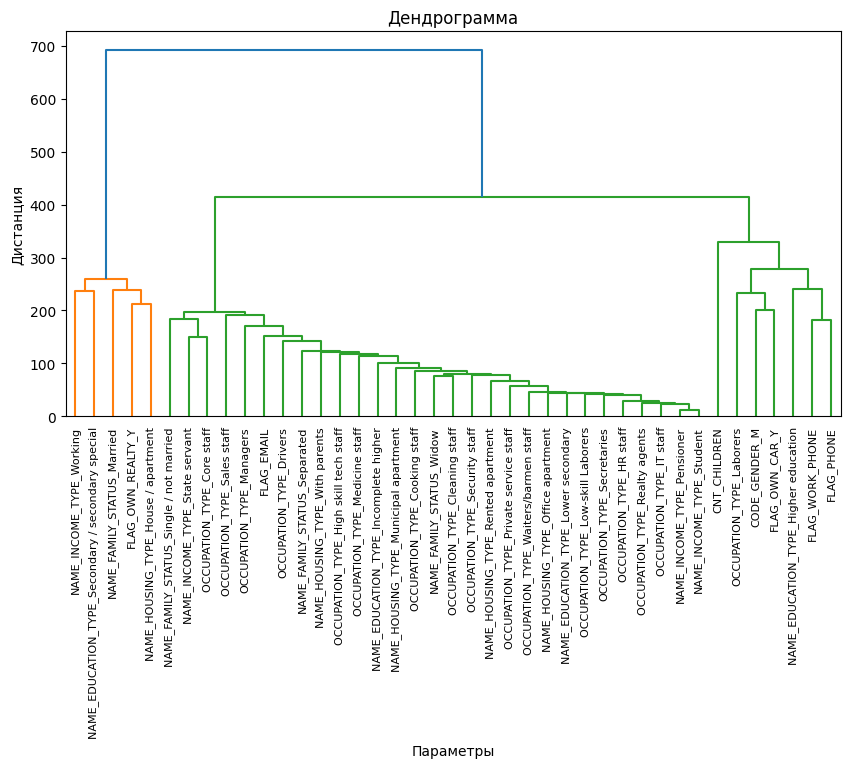

In [124]:
plt.figure(figsize=(10, 5))
dend = hierarchy.dendrogram(hierarchy.linkage(scaled_features, method='ward'),
                            labels=features.columns,
                            leaf_rotation=90)
plt.title('Дендрограмма')
plt.xlabel('Параметры')
plt.ylabel('Дистанция')
plt.show()

* Первый кластер (слева):

Переменные, связанные с типом дохода и семейным статусом.


* Второй крупный кластер (по середине):

Переменные, связанные с профессиональной деятельностью, владением собственностью и другими демографическими характеристиками.


* Третий крупный кластер (справа):

Переменные, связанные с наличием автомобиля, детей и другими характеристиками.

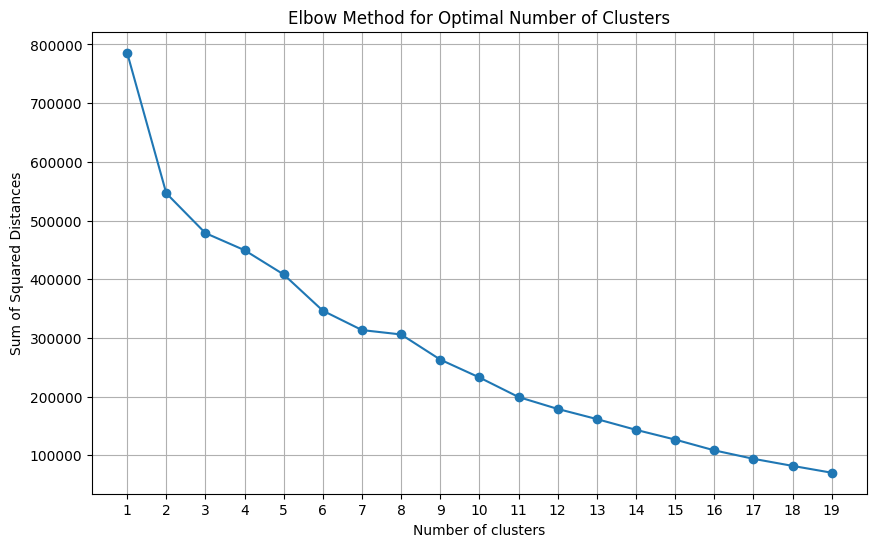

In [144]:
sse = [] # список для хранения значений сум кв расстояний для разных чисел кластеров
k_range = range(1, 20)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    sse.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(k_range, sse, marker='o', linestyle='-')
plt.xlabel('Number of clusters')
plt.ylabel('Sum of Squared Distances')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xticks(k_range)
plt.grid(True)
plt.show()

На данном графике точка локтя наблюдается около 3 b 8 кластеров

In [153]:
df_k = df.copy().drop(columns=['AMT_INCOME_TOTAL', 'DAYS_EMPLOYED', 'DAYS_BIRTH', 'STATUS'])
df_k

,CNT_CHILDREN,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,CODE_GENDER_M,FLAG_OWN_CAR_Y,FLAG_OWN_REALTY_Y,NAME_INCOME_TYPE_Pensioner,NAME_INCOME_TYPE_State servant,...,OCCUPATION_TYPE_Laborers,OCCUPATION_TYPE_Low-skill Laborers,OCCUPATION_TYPE_Managers,OCCUPATION_TYPE_Medicine staff,OCCUPATION_TYPE_Private service staff,OCCUPATION_TYPE_Realty agents,OCCUPATION_TYPE_Sales staff,OCCUPATION_TYPE_Secretaries,OCCUPATION_TYPE_Security staff,OCCUPATION_TYPE_Waiters/barmen staff
ID,,,,,,,,,,,,,,,,,,,,,
5008806,0.0,0.0,0.0,0.0,2.0,1.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
5008808,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
5008810,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
5008811,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
5008815,0.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5150480,1.0,0.0,0.0,0.0,3.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5150482,1.0,0.0,0.0,0.0,3.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5150484,1.0,0.0,0.0,0.0,3.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [155]:
n = 8
cl = KMeans(n_clusters=n, random_state=42)
cl.fit(df_k.values)

KMeans(random_state=42)

In [156]:
pd.DataFrame(cl.cluster_centers_.T, df_k.columns).head(5)

,0,1,2,3,4,5,6,7
CNT_CHILDREN,0.198748,2.187751,0.000264,0.172150,0.517518,0.016673,1.032628,0.118331
FLAG_WORK_PHONE,0.365154,0.295038,0.277836,0.281561,0.167668,0.302766,0.265687,0.237064
FLAG_PHONE,0.451748,0.275369,0.281266,0.336649,0.230230,0.281925,0.285766,0.247493
FLAG_EMAIL,0.156495,0.084935,0.075462,0.077276,0.153654,0.090186,0.096450,0.105897
CNT_FAM_MEMBERS,2.125196,4.173447,1.999736,1.172150,2.446947,1.998484,3.000000,1.121941


какие переменные имеют наибольшие стандартные отклонения среди центров кластеров. Это означает, что эти переменные вносят наибольший вклад в различие между кластерами

In [157]:
cl_centered = pd.concat([
    pd.DataFrame(cl.cluster_centers_.T, df_k.columns),
    pd.DataFrame({'std': pd.Series(np.std(cl.cluster_centers_, 0), df_k.columns)}),
], axis=1).sort_values('std', ascending=False).round(2)
cl_centered

,0,1,2,3,4,5,6,7,std
CNT_FAM_MEMBERS,2.13,4.17,2.00,1.17,2.45,2.00,3.00,1.12,0.93
CNT_CHILDREN,0.20,2.19,0.00,0.17,0.52,0.02,1.03,0.12,0.70
NAME_EDUCATION_TYPE_Higher education,0.95,0.31,-0.00,0.20,0.99,0.00,0.00,0.25,0.38
NAME_FAMILY_STATUS_Married,0.80,0.93,0.88,-0.00,0.85,0.87,0.84,0.00,0.38
NAME_EDUCATION_TYPE_Secondary / secondary special,-0.00,0.64,0.97,0.76,-0.00,0.93,0.94,0.68,0.37
NAME_FAMILY_STATUS_Single / not married,0.03,0.01,0.00,-0.00,0.03,0.00,0.01,1.00,0.33
CODE_GENDER_M,0.11,0.41,0.00,0.17,0.58,1.00,0.42,0.40,0.29
NAME_FAMILY_STATUS_Separated,0.04,0.01,0.00,0.69,0.04,0.01,0.02,0.00,0.22
FLAG_OWN_CAR_Y,0.15,0.50,0.26,0.20,0.82,0.65,0.43,0.30,0.22
NAME_FAMILY_STATUS_Widow,0.00,0.00,0.00,0.31,0.01,-0.00,0.00,-0.00,0.10


<Axes: >

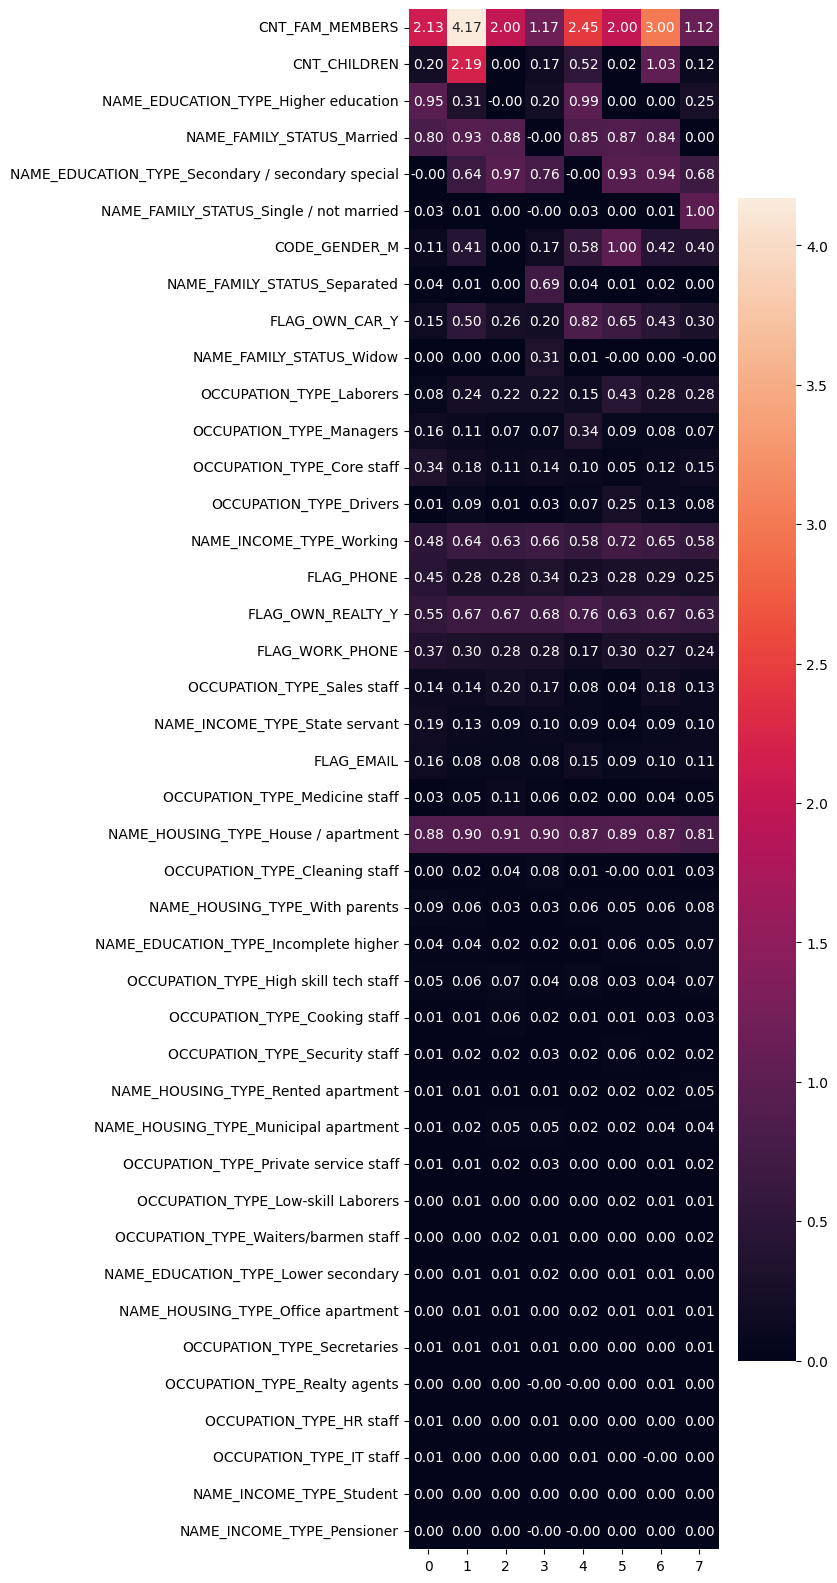

In [158]:
plt.figure(figsize=(5, 20))
sns.heatmap(cl_centered.drop(columns='std'), fmt='.2f', annot=True)

In [166]:
df_k2 = df_k.copy()[cl_centered[cl_centered['std'] >= 0.1].index]

In [167]:
n = 3
cl = KMeans(n_clusters=n, random_state=42)
cl.fit(df_k2.values)
cl_centered = pd.concat([
    pd.DataFrame(cl.cluster_centers_.T, df_k2.columns),
    pd.DataFrame({'std': pd.Series(np.std(cl.cluster_centers_, 0), df_k2.columns)}),
], axis=1).sort_values('std', ascending=False).round(2)
cl_centered

,0,1,2,std
CNT_FAM_MEMBERS,1.67,3.43,1.88,0.78
CNT_CHILDREN,0.07,1.45,0.06,0.65
FLAG_OWN_CAR_Y,0.05,0.48,1.00,0.39
CODE_GENDER_M,0.22,0.41,0.63,0.17
NAME_FAMILY_STATUS_Married,0.52,0.88,0.75,0.15


* CNT_FAM_MEMBERS (Количество членов семьи)
* CNT_CHILDREN (Количество детей)
* NAME_FAMILY_STATUS_Married (Семейное положение: женат/замужем)
* NAME_FAMILY_STATUS_Single / not married (Семейное положение: одинок/не в браке)
* FLAG_OWN_CAR_Y (Наличие машины)
* NAME_INCOME_TYPE_Pensioner (Пенсионер)

<Axes: >

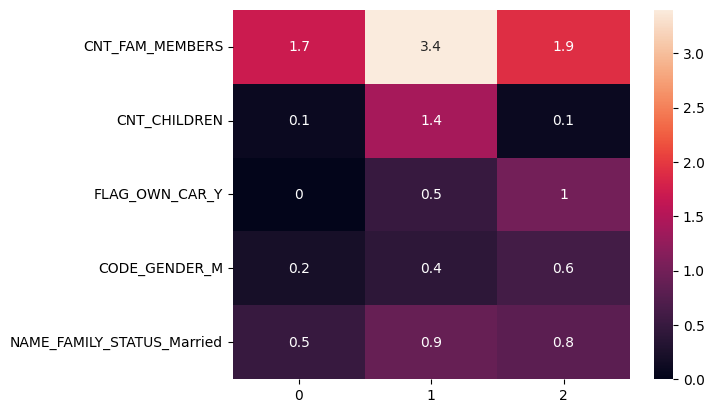

In [168]:
sns.heatmap(cl_centered.drop(columns='std').round(1), annot=True)

1. Кластер 0: Малое количество членов семьи, нет детей, машины и наличие семейного статуса → низкая вероятность одобрения кредитных карт

2. Кластер 1: Большое кол-во членов семьи, дети → высокая вероятность одобрения кредитных карт

3. Кластер 2: Семейная пара с машиной и без детей → средняя вероятность одобрения кредитных карт

# 2. Осуществить отбор показателей для включения в модель. Используем дисперсионный анализ: однофакторный и многофакторный. 

In [181]:
import statsmodels.api as sm
from statsmodels.formula.api import ols